In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
##importing the csv file
import io
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [ ]:
##Checking the first 5 entries
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
##checking the shape of dataframe
df.shape
##The dataframe has 5000 entries and 14 columns

(5000, 14)

In [ ]:
##checking the typesof datatypes in the dataframe
df.info()
##the dataframe has 13 integer datatype and 1 float datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
##checking for null values
df.isna().sum()
##by seeing there is no null values is present in the data

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
##checking for duplicate values.If found dropping the null values
df.duplicated().sum()
##No null values in the data

0

In [ ]:
## Dropping the id and zipcode as it is not important for the modelbuilding
df.drop(["ID","ZIP Code"],axis=1,inplace=True)

In [ ]:
df.info()
##after the dropping the 2 columns we have 11 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [ ]:
##five point summary
df.describe()
## the average of the clients in the data is 45,minimum is 23 and maximumis 67.

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
df["Experience"].value_counts()



 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [ ]:
##There are some negative values are there need to make them positive
df["Experience"]=df["Experience"].abs()

In [ ]:
df["Experience"].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
17    125
34    125
27    125
29    124
22    124
7     121
8     119
6     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

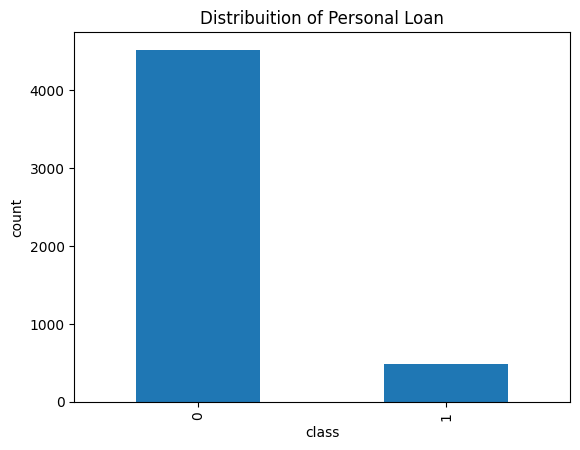

In [ ]:
df["Personal Loan"].value_counts().plot(kind="bar")
plt.xlabel("class")
plt.ylabel("count")
plt.title("Distribuition of Personal Loan")
plt.show()
##as we can see only 500 has taken the personal loan and 4500 are not taken the loan

In [ ]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
##Storing target variable in y and independent variable in x

X=df.drop(["Personal Loan"],axis=1)
y=df["Personal Loan"]

In [ ]:
##splitting the dataset into 70% and 30% for training and testing purpose
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print("Shape of training feature:",X_train.shape)
print("Shape of testing feature:",X_test.shape)
print("Shape of training feature:",y_train.shape)
print("Shape of testing feature:",y_test.shape)

Shape of training feature: (3500, 11)
Shape of testing feature: (1500, 11)
Shape of training feature: (3500,)
Shape of testing feature: (1500,)


In [ ]:
##standardizing the independent variable
se=StandardScaler()
X_train=se.fit_transform(X_train)
X_test=se.transform(X_test)

In [ ]:
##Logistic Regression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
## Check for the accuracy of the model
accuracy_score(y_test,y_pred)
##as we can see the accuracy is 95%

0.952

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix






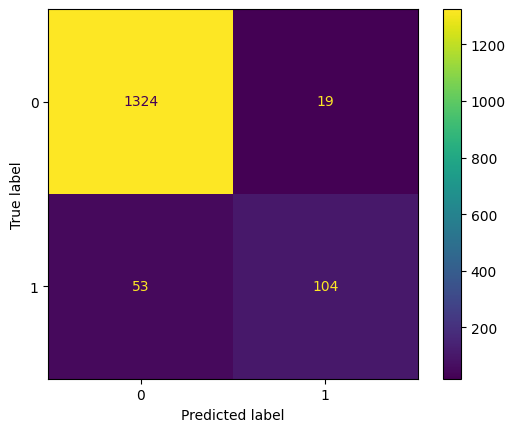

In [ ]:
##Confusion matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix)
cm_display.plot()
plt.show()
##as we can see the model predicted the 1324 values as true positive so we can say that this model is deployable

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
##as we can see the accuracy is 0.95

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.85      0.66      0.74       157

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.86      1500
weighted avg       0.95      0.95      0.95      1500



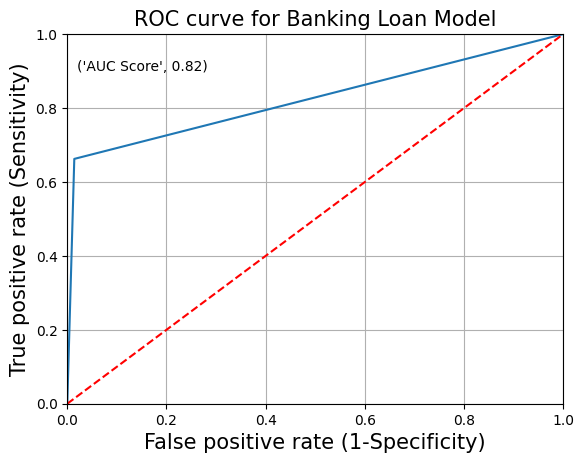

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],"r--")
plt.title('ROC curve for Banking Loan Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02,y=0.9,s=("AUC Score",round(metrics.roc_auc_score(y_test,y_pred),2)))

plt.grid(True)